METODO OTSU , calculando el Histograma

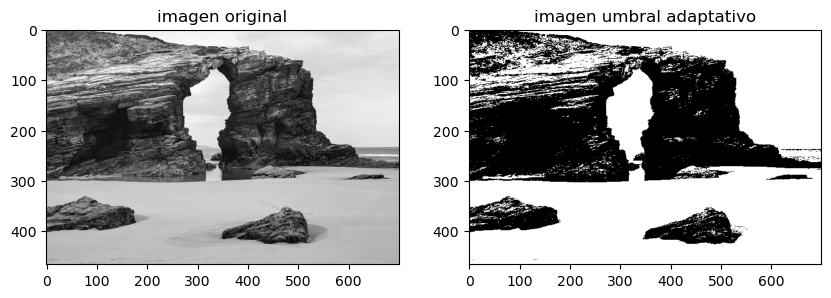

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
def tecnica_otsu(imagen):
    histo = cv2.calcHist([imagen],[0],None,[256],[0,256])
    histo_norm = histo.ravel()/histo.sum()
    Q = histo_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
 
    for i in range(1,256):
        p1,p2 = np.hsplit(histo_norm,[i]) 
        q1,q2 = Q[i],Q[255]-Q[i]
        if q1 < 1.e-6 or q2 < 1.e-6:
            continue
        b1,b2 = np.hsplit(bins,[i])
 
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
 
    img_otsu = imagen>=thresh
    return img_otsu
 
imagen = cv2.imread('2.png', 0)
umbral_OTSU = tecnica_otsu(imagen)
 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('imagen original')
plt.imshow(imagen, cmap='gray')
 
plt.subplot(1,2,2)
plt.title('imagen umbral adaptativo')
plt.imshow(umbral_OTSU, cmap='gray')
 
plt.show()
 